### Import the necessary packages

In [ ]:
import numpy
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

### Load data

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### Data Analysis

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[0]

5

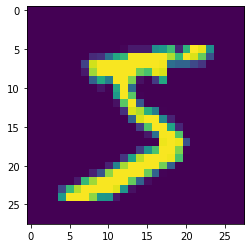

In [ ]:
plt.imshow(X_train[0])

### Data Pre-Processing

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [ ]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [ ]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Create model

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

### Train the model

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 198s 105ms/step - loss: 0.2319 - accuracy: 0.9515 - val_loss: 0.0960 - val_accuracy: 0.9673
Epoch 2/5
1875/1875 [==============================] - 194s 104ms/step - loss: 0.0727 - accuracy: 0.9785 - val_loss: 0.0811 - val_accuracy: 0.9735
Epoch 3/5
1875/1875 [==============================] - 219s 117ms/step - loss: 0.0480 - accuracy: 0.9847 - val_loss: 0.0948 - val_accuracy: 0.9728
Epoch 4/5
1875/1875 [==============================] - 195s 104ms/step - loss: 0.0386 - accuracy: 0.9875 - val_loss: 0.0908 - val_accuracy: 0.9743
Epoch 5/5
1875/1875 [==============================] - 196s 104ms/step - loss: 0.0297 - accuracy: 0.9910 - val_loss: 0.0856 - val_accuracy: 0.9795


### Test the model

In [ ]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.08561036735773087, 0.9794999957084656]


In [ ]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 90ms/step
[[4.4845716e-08 8.1563656e-16 5.5213068e-08 7.7072372e-07 6.3681460e-13
  6.3987184e-13 1.3781421e-19 9.9999857e-01 1.0897972e-07 4.5359829e-07]
 [1.7003470e-11 3.2714575e-12 1.0000000e+00 3.1876215e-15 2.3836042e-16
  1.6028213e-19 5.4099312e-11 1.7523260e-14 2.5997786e-13 4.5190683e-20]
 [1.5215224e-09 9.9988949e-01 1.1212361e-07 9.8009942e-12 9.9847239e-07
  5.6539637e-08 2.9455186e-10 8.5724189e-08 1.0933233e-04 7.5586126e-12]
 [9.9999690e-01 3.4020848e-12 1.0612883e-07 6.7384309e-13 5.1527230e-11
  1.8145077e-08 2.9637008e-06 2.5088456e-09 5.4684830e-09 4.8801081e-08]]


In [ ]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
